In [184]:
import numpy as np
from matplotlib import pyplot as plt

from rotation import FastHadamardRotation
from quantization import QuantizationHandler

In [ ]:
#load embedding from cache/embeddings/mxbai-embed-large-v1_NFCorpus_corpus.npy


x = np.load("cache/embeddings/mxbai-embed-large-v1_NFCorpus_corpus.npy")
q = np.load("cache/embeddings/mxbai-embed-large-v1_NFCorpus_queries.npy")

dims = [ 512, 256, 128, 64, 32, 16, 8, 4, 2]



In [188]:
d = 1024

rot = FastHadamardRotation(d)
x_rotated = rot.rotate(x)
q_rotated = rot.rotate(q)

In [ ]:
x_rot_quant = 

(3633, 1024)

In [189]:
diffs = np.max(x,axis=1) - np.min(x,axis=1)
diffs_rot = np.max(x_rotated,axis=1) - np.min(x_rotated,axis=1)

print(np.mean(diffs), np.mean(diffs_rot))


0.3346566 0.20063789


In [167]:
inner_products = []
inner_products_res = []
norm_res = []

q0 = q[2]

for dim in dims:
    x_dim = x[:, :dim]
    q_dim = q0[:dim]

    x_res = x[:, dim:]
    q_res = q0[dim:]

    inner_product = np.abs(np.dot(x_dim, q_dim))
    inner_products.append(inner_product)

    if dim == 1024:
        continue
    inner_product_res = np.abs(np.dot(x_res, q_res))
    inner_products_res.append(inner_product_res)
    norm_res.append(np.linalg.norm(q_res,axis=0,ord=2)*np.linalg.norm(x_res,axis=1,ord=2))

top_100 = np.argsort(inner_products[0])[-100:]


inner_products = np.array(inner_products)[:,top_100]
inner_products_res = np.array(inner_products_res)[:,top_100]
norm_res = np.array(norm_res)[:,top_100]

#get sort index for inner products
sort_idx = np.argsort(inner_products[:,:],axis=1)
sort_diff = np.abs(sort_idx - sort_idx[0,:])
sort_diff_mean = np.mean(sort_diff,axis=1)



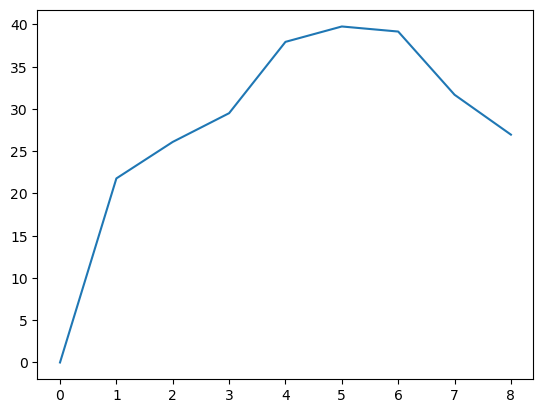

In [171]:
plt.plot(sort_diff_mean)

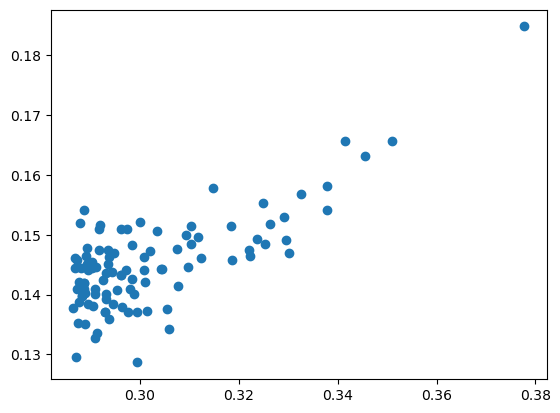

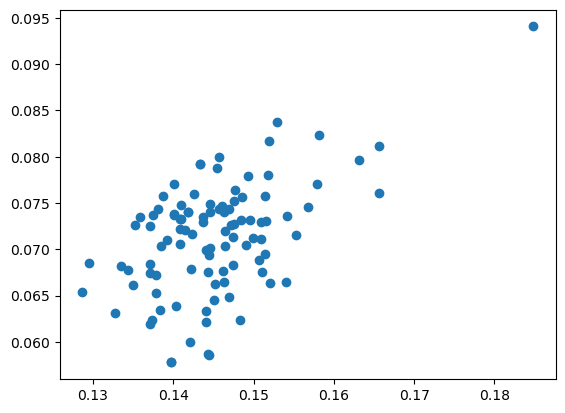

In [180]:
m = 100

i, j = 0, 1
fig, ax = plt.subplots()
ax.scatter(inner_products[i, 0:m], inner_products[j, 0:m])


i, j = 1,2
fig, ax = plt.subplots()
ax.scatter(inner_products[i, 0:m], inner_products[j, 0:m])

plt.show()

Text(0, 0.5, 'Inner Product')

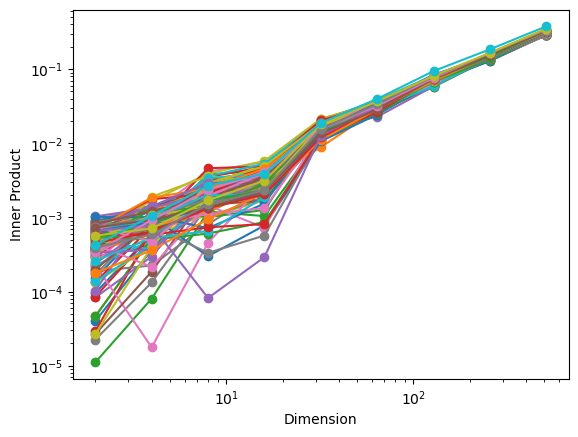

In [175]:
m = 100

plt.loglog(dims, inner_products[:,0:m], label="Inner Product (Dim)",marker='o')
#plt.loglog(dims[1:], inner_products_res[1:,0:m], label="Inner Product (Residual)", linestyle='--')

#plt.loglog(dims, inner_products[:,0:m] + inner_products_res[:,0:m], label="Inner Product (Dim + Residual)",marker='o')

plt.xlabel("Dimension")
plt.ylabel("Inner Product")


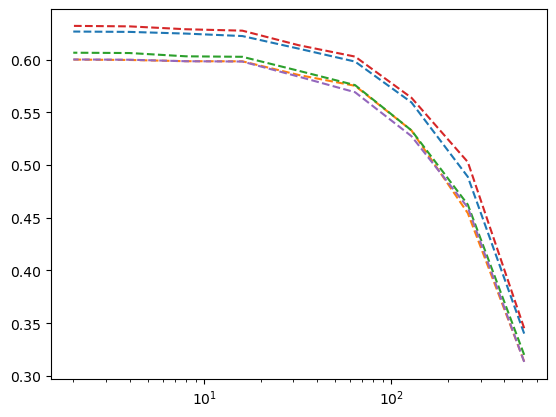

In [176]:
plt.semilogx(dims, inner_products_res[:,0:5], label="Inner Product (Residual)", linestyle='--')